------- NEW COV ----------
cov/cov_LSST_Y10_area1.135200e+04_ng1.918510e+01_nl3.285780e+01
------- NEW COV ----------
1725 1725
min+max eigenvalues full cor:
0.0020588112057397345 57.26636252646946
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
7.510529214591625e-24 1.7127660116375886e-10


/Users/timeifler/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


------- NEW COV ----------
cov/cov_LSST_Y10_area1.286780e+04_ng1.330660e+01_nl2.170300e+01
------- NEW COV ----------
1680 1680
min+max eigenvalues full cor:
0.004282296588774486 42.8089656416707
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
1.365308818684697e-23 1.7295105845405648e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area9.747990e+03_ng1.111050e+01_nl1.768990e+01
------- NEW COV ----------
1650 1650
min+max eigenvalues full cor:
0.006688907064018329 38.124329029958055
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
2.6186603862037556e-23 2.4704513348234017e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area1.321270e+04_ng2.489560e+01_nl4.414800e+01
------- NEW COV ----------
1770 1770
min+max eigenvalues full cor:
0.0011014314630476496 73.34254236066904
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
3.847942515559842e-24 1.3482484895518233e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area1.405970e+04_ng2.359790e+01_nl4.154870e+01
------- NEW COV 

min+max eigenvalues 3x2 cov:
7.20908750169717e-24 1.1329989604331234e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area1.741890e+04_ng9.072180e+00_nl1.405870e+01
------- NEW COV ----------
1650 1650
min+max eigenvalues full cor:
0.009521164917075331 34.917673438994534
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
2.1703032533300567e-23 1.5243541415959061e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area1.111270e+04_ng3.288210e+01_nl6.051840e+01
------- NEW COV ----------
1800 1800
min+max eigenvalues full cor:
0.0005722498535881223 92.23478104447327
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
2.6366298333307493e-24 1.5123589071143902e-10
------- NEW COV ----------
cov/cov_LSST_Y10_area1.526000e+04_ng2.583270e+01_nl4.603640e+01
------- NEW COV ----------
1770 1770
min+max eigenvalues full cor:
0.0010106349478622607 76.77423304708063
neg eigenvalues full cor:
min+max eigenvalues 3x2 cov:
3.068307778843573e-24 1.1450753356530714e-10
------- NEW COV ----------
cov/

IOError: cov/cov_LSST_Y10_area1.351050e+04_ng2.252650e+01_nl3.941680e+01 not found.

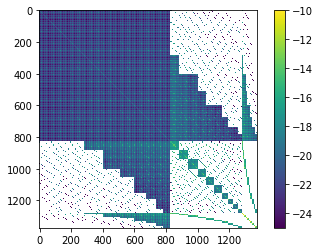

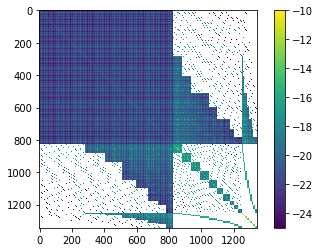

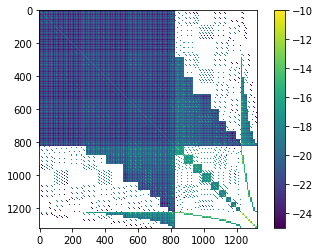

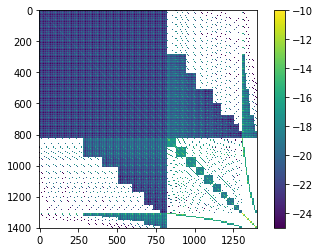

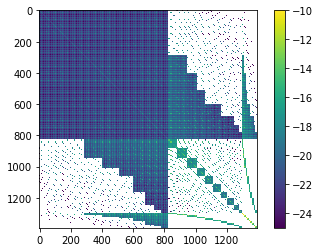

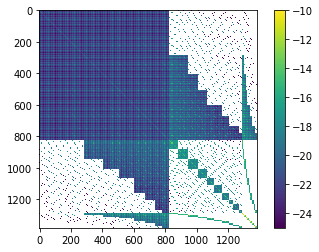

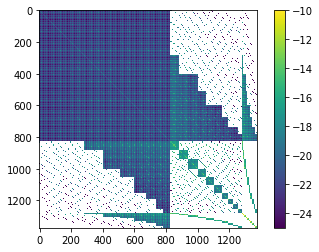

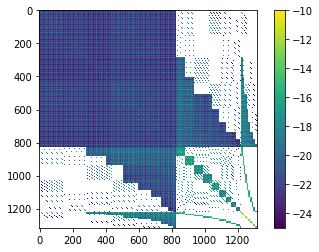

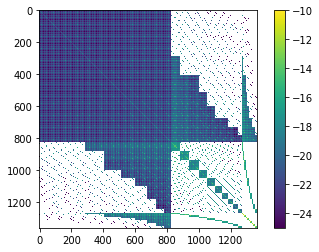

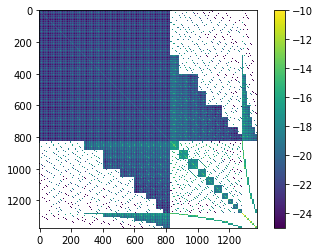

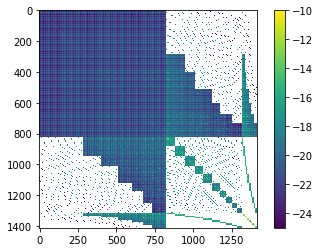

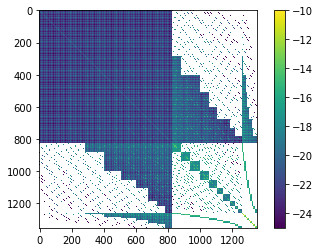

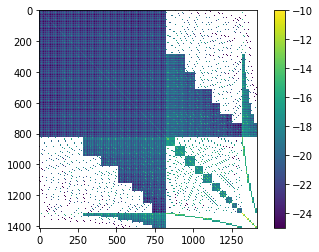

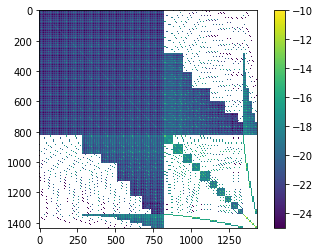

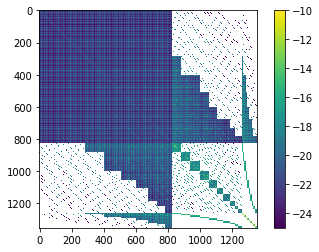

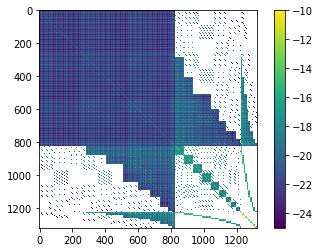

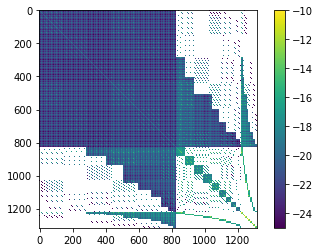

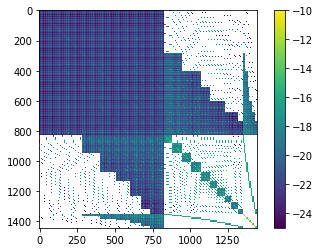

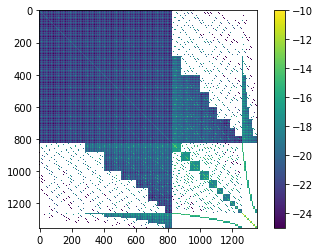

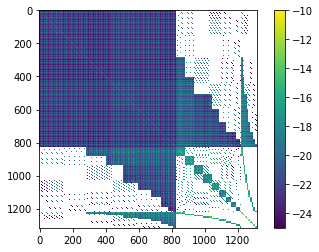

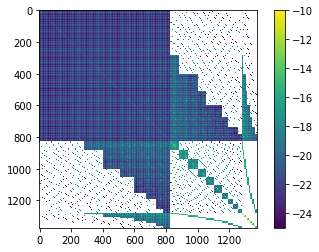

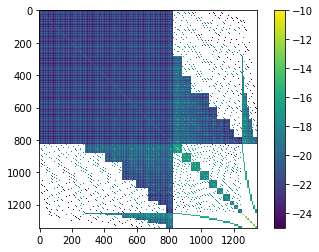

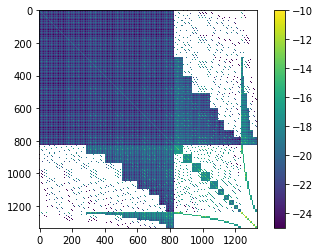

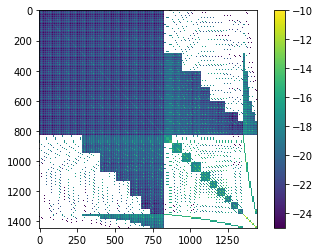

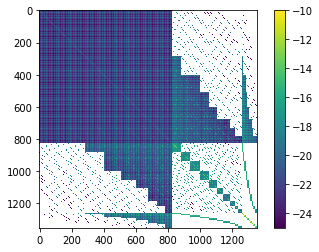

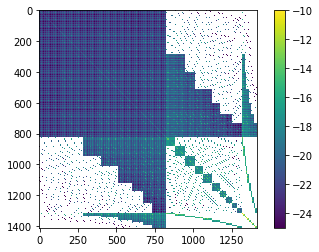

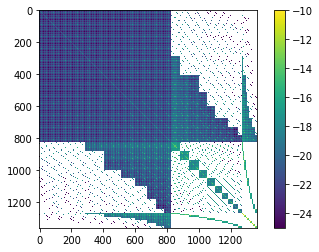

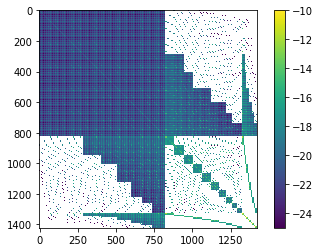

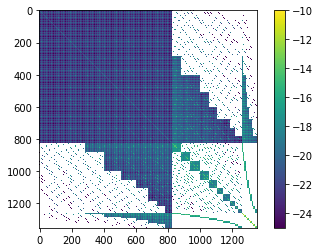

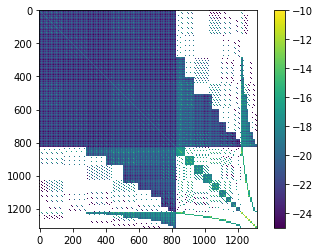

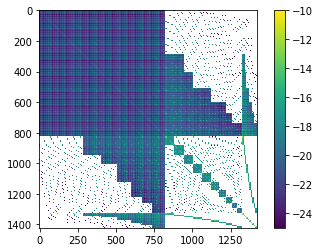

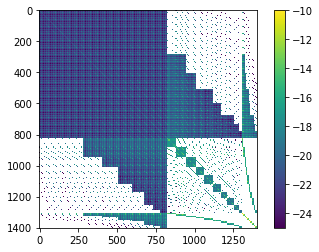

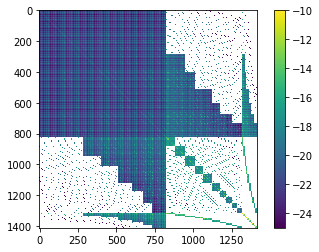

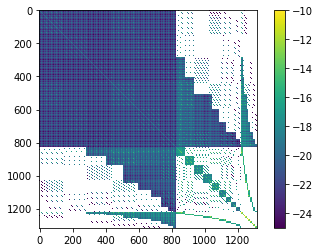

In [22]:
import sys
import os
import math, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import linalg as LA
import numpy as np

infile = os.listdir('cov/')
data = [x[4:29] for x in infile]
data= [i.replace('LSST_Y10','LSST_3x2pt_Y10') for i in data]
outname= [i.replace('cov_','') for i in infile]


for k in range(0,36):
    print "------- NEW COV ----------"
    print "cov/"+infile[k]
    print "------- NEW COV ----------"
    datafile= np.genfromtxt("datav/"+data[k])
    ndata=datafile.shape[0]
    mask = np.zeros(ndata)
    for i in range(0,datafile.shape[0]):
        if (datafile[i,1] >1.0e-15): 
            mask[i]=1.0

    covfile = np.genfromtxt("cov/"+infile[k])
    cov = np.ones((ndata,ndata))
    
    print ndata,int(np.max(covfile[:,0])+1)

    for i in range(0,covfile.shape[0]):
        cov[int(covfile[i,0]),int(covfile[i,1])] = covfile[i,8]+covfile[i,9]
        cov[int(covfile[i,1]),int(covfile[i,0])] = covfile[i,8]+covfile[i,9]
    
    if 1. in cov[:, :]:
        print "Caution, covparallel file missing"
        
            
    cor = np.zeros((ndata,ndata))
    for i in range(0,ndata):
        for j in range(0,ndata):
            if (cov[i,i]*cov[j,j] >0):
                cor[i,j] = cov[i,j]/math.sqrt(cov[i,i]*cov[j,j])


    a = np.sort(LA.eigvals(cor[:,:]))
    
    print "min+max eigenvalues full cor:"
    print np.min(a), np.max(a)
    print "neg eigenvalues full cor:"
    for i in range(0,a.shape[0]):
        if (a[i]< 0.0): print a[i]

    inv = LA.inv(cov[0:ndata,0:ndata])
    a = np.sort(LA.eigvals(cov[0:ndata,0:ndata]))
    print "min+max eigenvalues 3x2 cov:"
    print np.min(a), np.max(a)
    outfile = "inv/inv_"+outname[k]
    f = open(outfile, "w")
    for i in range(0,ndata):
        inv[i,i]=inv[i,i]*mask[i]
        for j in range(0,ndata):
            f.write("%d %d %e\n" %(i,j, inv[i,j]))
    f.close()
    
    maskindices=np.where(mask == 0)[0]
    covnew=np.delete(cov, maskindices, 0)
    covcut=np.delete(covnew, maskindices, 1)
    covzero=np.where(covcut == 0)[0]

    plt.figure()
    plt.imshow(np.log10(np.abs(covcut[:,:])), interpolation="nearest",vmin=-25, vmax=-10)
    plt.colorbar()
    savefile="plots/covcut_"+outname[k]+".png"
    plt.savefig(savefile, format='png', dpi=2000)

/Users/timeifler/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


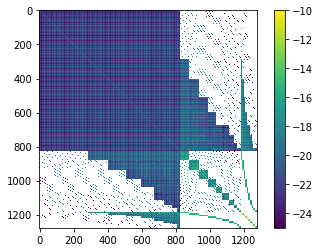